In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import io

In [27]:
# .mat's are ~ 80, 330, and 300 mb respectively
datafolder = '/Users/rdgao/Documents/data/Stringer_neuropixel/spikes/'
krebs = io.loadmat(datafolder+'spks/spksKrebs_Feb18.mat', squeeze_me = True)
robbins = io.loadmat(datafolder+'spks/spksRobbins_Feb18.mat', squeeze_me = True)  
waksman = io.loadmat(datafolder+'spks/spksWaksman_Feb18.mat', squeeze_me = True)

KeyboardInterrupt: 

format: data['spks'][0][1]    

['spks'][probe #][0: times, 1: cluster id, 2: heights]

In [59]:
#returns a length 8 array containing dictionaries {Cluster_n: Time_n}

def make_spike_array(data):
    main_spike_array = np.array([]) #has 8 dictionaries

    for i in np.arange(8):
        spikes = data['spks'][i][0]
        clusters = data['spks'][i][1]
        spike_to_cluster = np.vstack((spikes, clusters)).T

        cluster_ids = list(set(clusters)) #1-305

        neuron_times = {k: [] for k in cluster_ids}

        for i in cluster_ids:
            neuron_times[i] = np.sort(spikes[clusters==i])

        main_spike_array = np.append(main_spike_array, neuron_times)   
        
    return main_spike_array

In [60]:
krebs_spks = make_spike_array(krebs)
#robbins_spks = make_spike_array(robbins)
#waksman_spks = make_spike_array(waksman)

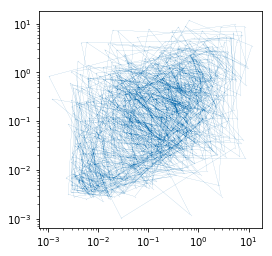

In [102]:
len(krebs_spks[0][7])
isi = np.diff(krebs_spks[0][3][:1000])
delay = 1
plt.figure(figsize=(4,4))
plt.loglog(isi[:-delay], isi[delay:], '.-', ms=0.1, lw=0.1)
# #krebs['spks'][0][0][krebs['spks'][0][1]==1]
# spikes = krebs['spks'][0][0]
# cluster = krebs['spks'][0][1]
# #plt.figure(figsize=(15,4))
# #plt.plot(spikes, cluster, '.', ms=0.1)
# plt.hist(np.diff(np.sort(spikes[cluster==5])), np.arange(0,2,0.01));